In [1]:
library(igraph)
options(repr.plot.width = 12, repr.plot.height =8)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
df <- data.frame("n1" = c('A','A','A','A','B','C','F','E','D','A','P','P','B'),
                 "n2" = c('B','C','E','F','C','F','D','D','A','P','Q','R','R'),
                 "weight"= c(2,3,2,5,3,3,1,2,3,2,4,2,2))
df

n1,n2,weight
<fct>,<fct>,<dbl>
A,B,2
A,C,3
A,E,2
A,F,5
B,C,3
C,F,3
F,D,1
E,D,2
D,A,3


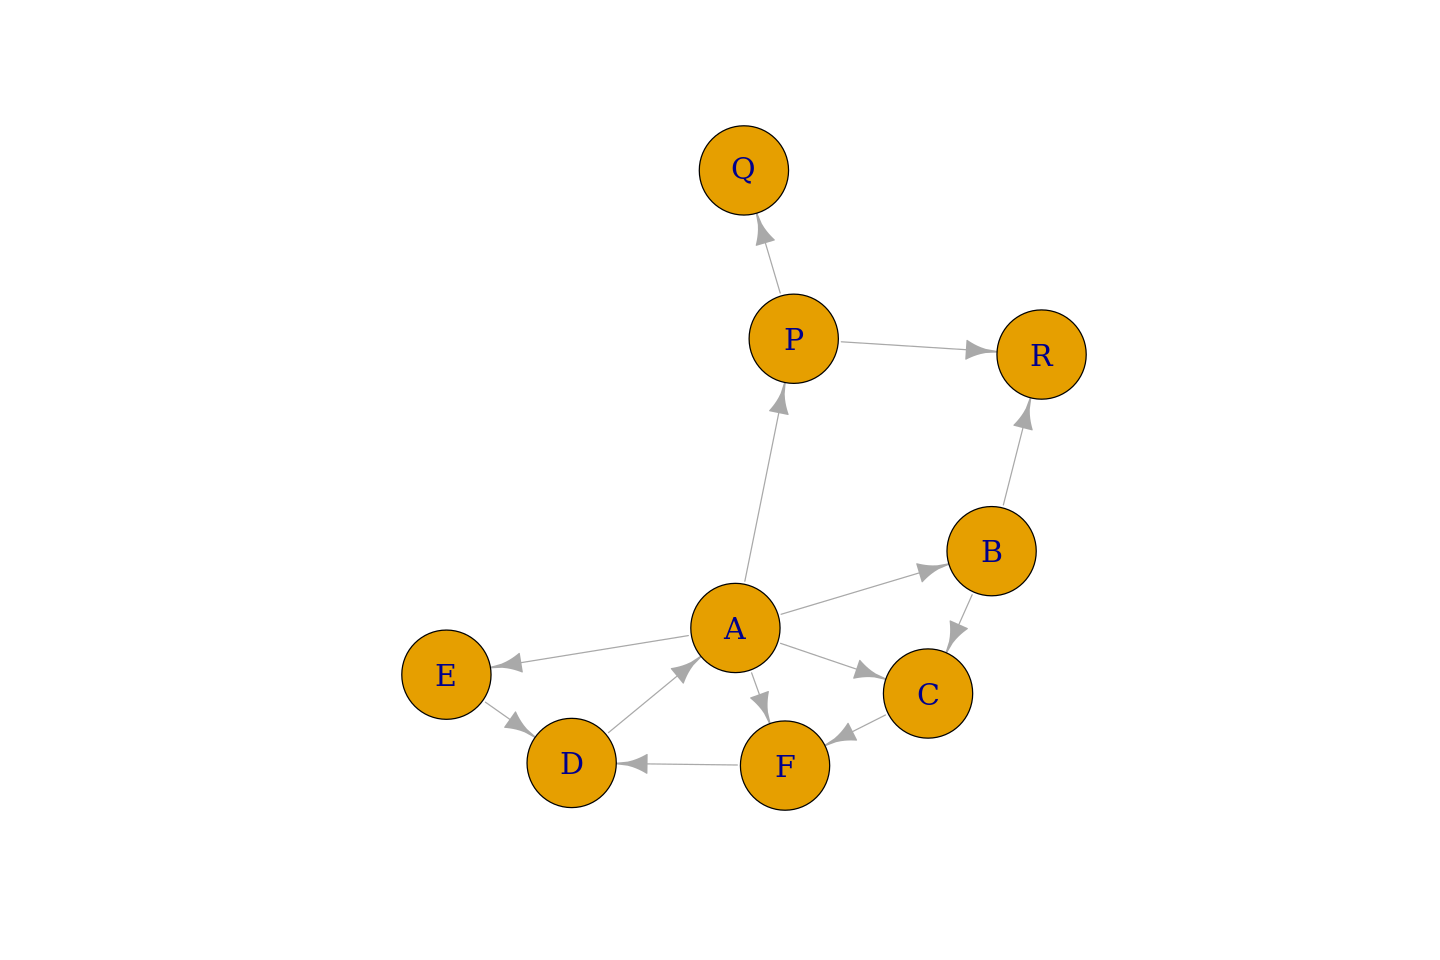

In [3]:
graph_df <- graph_from_data_frame(df, directed=T)
plot(graph_df,vertex.size=30 , vertex.label.cex=1.5)

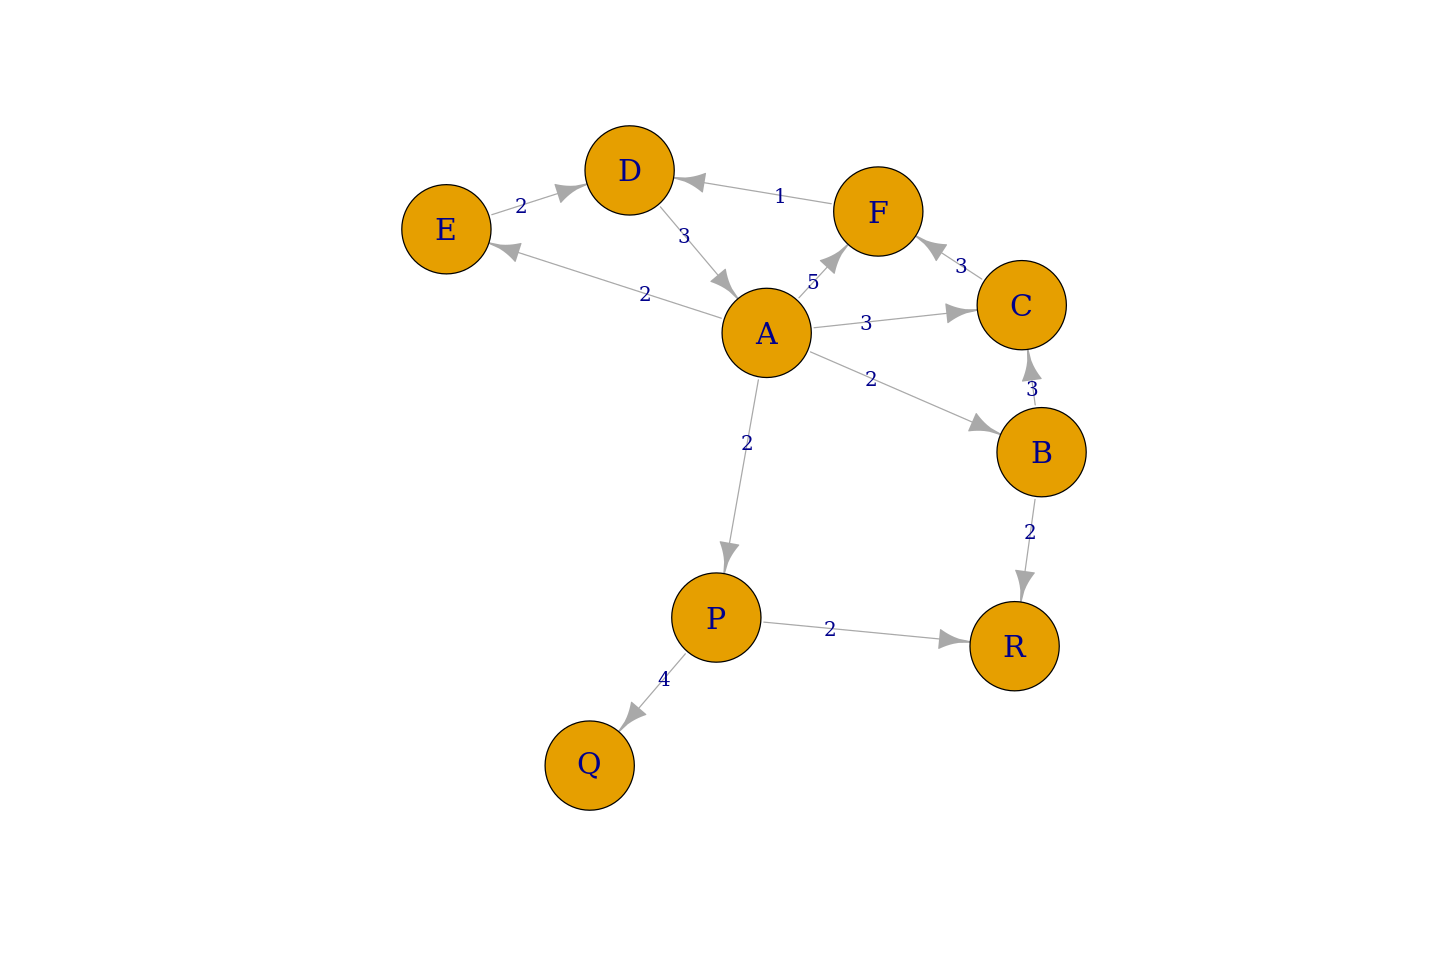

In [6]:
graph_df <- set_edge_attr(graph_df,"label", value = E(graph_df)$weight)
plot(graph_df,vertex.size=30 , vertex.label.cex=1.5)

In [18]:
# Compute shortest path using dijkstra algorithm with mode 'out'
distances(graph_df, v = c('A'), to= c('F','D'), mode = c('out'), algorithm = c('dijkstra'))

,F,D
A,5,4


In [19]:
# Compute shortest path using bellman ford algorithm with mode 'out'
distances(graph_df, v = c('P'), to= c('Q','B'), mode = c('out'), algorithm = c('bellman-ford'))

,Q,B
P,4,Inf


In [20]:
# Compute shortest path using dijkstra algorithm with mode 'in'
distances(graph_df, v = c('A'), to= c('F','D'), mode = c('in'), algorithm = c('dijkstra'))

,F,D
A,4,3


In [21]:
# Compute shortest path using bellman ford algorithm with mode 'in'
distances(graph_df, v = c('P'), to= c('Q','B'), mode = c('in'), algorithm = c('bellman-ford'))

,Q,B
P,Inf,12


In [22]:
# Compute shortest path using dijkstra algorithm with mode 'all'
distances(graph_df, v = c('A'), to= c('F','D'), mode = c('all'), algorithm = c('dijkstra'))

,F,D
A,4,3


In [23]:
# Compute shortest path using bellman ford algorithm with mode 'all'
distances(graph_df, v = c('P'), to= c('Q','B'), mode = c('all'), algorithm = c('bellman-ford'))

,Q,B
P,4,4


In [27]:
#Compute the shotest path with mode 'out'
path <- shortest_paths(graph_df, from = 'F' , to = c('A'),  mode= c('out'))
path$vpath

[[1]]
+ 3/9 vertices, named, from 586dafb:
[1] F D A


In [28]:
#Compute the shotest path with mode 'in'
path <- shortest_paths(graph_df, from = 'F' , to = c('A'),  mode= c('in'))
path$vpath

[[1]]
+ 2/9 vertices, named, from 586dafb:
[1] F A


In [29]:
#Compute the shotest path with mode 'all'
path <- shortest_paths(graph_df, from = 'F' , to = c('A'),  mode= c('all'))
path$vpath

[[1]]
+ 3/9 vertices, named, from 586dafb:
[1] F D A


In [30]:
#Compute the shotest path with mode 'out'
path <- shortest_paths(graph_df, from = 'F' , to = c('A', 'E'),  mode= c('out'))
path$vpath

[[1]]
+ 3/9 vertices, named, from 586dafb:
[1] F D A

[[2]]
+ 4/9 vertices, named, from 586dafb:
[1] F D A E
